In [1]:
import numpy as np

# Datos
x_vals = np.array([1, 3, 5, 7, 9])
y_vals = np.array([3, 0, -1, 2.5, 1])
x_objetivo = 4.25

# Función de Lagrange
def lagrange_interp(x, y, x_val):
    n = len(x)
    total = 0
    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x_val - x[j]) / (x[i] - x[j])
        total += L_i * y[i]
    return total

# Selección de puntos base para cada grado
grados = {
    "Grado 1": ([3, 5], [0, -1]),
    "Grado 2": ([3, 5, 7], [0, -1, 2.5]),
    "Grado 3": ([3, 5, 7, 9], [0, -1, 2.5, 1])
}

# Resultados
print(f"Estimaciones de f({x_objetivo}):\n")

for grado, (x_sub, y_sub) in grados.items():
    estimado = lagrange_interp(np.array(x_sub), np.array(y_sub), x_objetivo)
    print(f"{grado}: f({x_objetivo}) ≈ {estimado:.4f}")


Estimaciones de f(4.25):

Grado 1: f(4.25) ≈ -0.6250
Grado 2: f(4.25) ≈ -1.1523
Grado 3: f(4.25) ≈ -1.6626


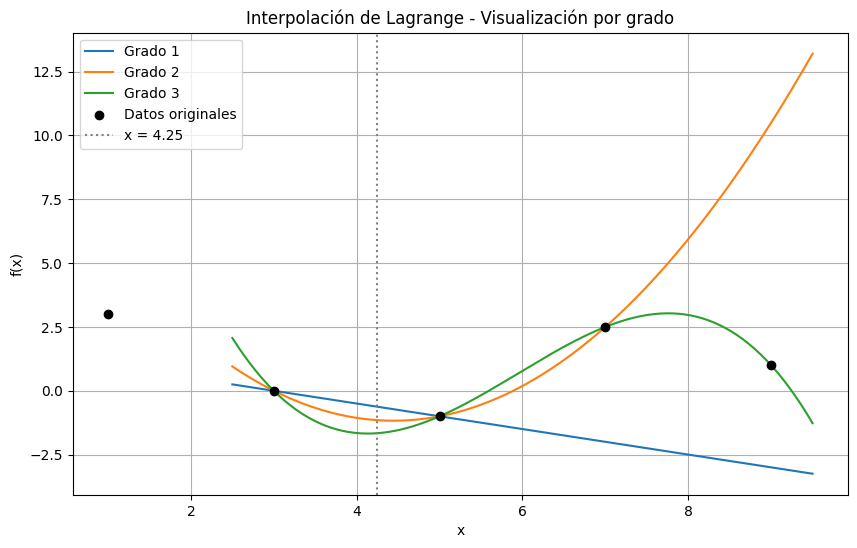

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Datos
x_vals = np.array([1, 3, 5, 7, 9])
y_vals = np.array([3, 0, -1, 2.5, 1])
x_objetivo = 4.25

# Función de Lagrange
def lagrange_interp(x, y, x_eval):
    total = 0
    n = len(x)
    for i in range(n):
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x_eval - x[j]) / (x[i] - x[j])
        total += L_i * y[i]
    return total

# Grados y sus subconjuntos
grados = {
    "Grado 1": ([3, 5], [0, -1]),
    "Grado 2": ([3, 5, 7], [0, -1, 2.5]),
    "Grado 3": ([3, 5, 7, 9], [0, -1, 2.5, 1])
}

# Gráfica
x_range = np.linspace(2.5, 9.5, 300)
plt.figure(figsize=(10, 6))

for grado, (x_sub, y_sub) in grados.items():
    y_plot = [lagrange_interp(np.array(x_sub), np.array(y_sub), x) for x in x_range]
    plt.plot(x_range, y_plot, label=f"{grado}")

# Puntos originales
plt.scatter(x_vals, y_vals, color='black', label='Datos originales', zorder=5)
plt.axvline(x=x_objetivo, color='gray', linestyle=':', label=f"x = {x_objetivo}")

plt.title("Interpolación de Lagrange - Visualización por grado")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()
